## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임>세션 다시 시작 클릭 후 코드 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

# 7차시: 데이터 분석 종합(데이터 로드,데이터 탐색)
    - 대상 파일: basic_info.csv, history_info.csv

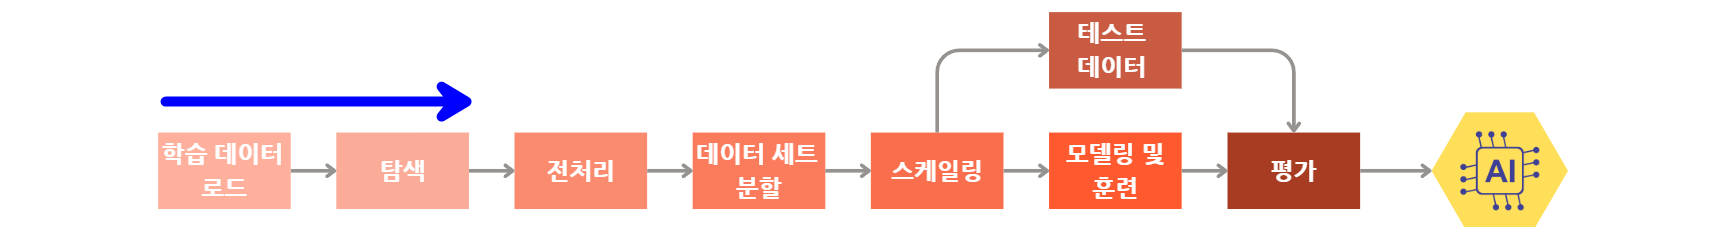

### <font color="#5D6D7E"><b>목적</b></font>  
<b>중고차 거래 가격을 예측</b>할 수 있도록, 차량의 기본 정보 및 거래 이력을 활용하여 머신러닝 기반 예측 모델을 구축합니다.

### <font color="#5D6D7E"><b>배경 시나리오</b></font>

<b>A 자동차 거래 플랫폼</b>은 중고차의 잔존 가치를 추정하기 위해, 실제 거래된 차량들의 기본 사양과 이력 정보를 수집하였습니다.  
차량의 주행거리, 연식, 연료 종류, 사고 이력, 옵션 수, 수리비 등을 바탕으로 중고차의 <b>판매가(`price`)</b>를 예측하는 모델을 만들고자 합니다.

---

[데이터 설명: basic_info.csv]
- `car_id`: 차량 고유 ID
- `year`: 차량 연식 (출고년도)
- `mileage`: 누적 주행거리 (km)
- `fuel_type`: 연료 종류 (Diesel, Gasoline 등)
- `brand`: 차량 브랜드 (예: Kia)
- `engine_size`: 배기량 (cc)
- `transmission`: 변속기 종류 (Manual, Auto)

[데이터 설명: `history_info.csv`]
- car_id: 차량 고유 ID (기본정보와 연결)
- accident_yn: 사고 유무 (0=무사고, 1=사고 있음)
- option_count: 장착 옵션 개수
- prev_owners: 이전 소유자 수
- repair_cost: 수리비용 (백만원 기준)
- **price: 판매가 (만원 기준)**

---

### 문제 1. pandas는 pd, numpy는 np라는 별칭으로 임포트 하시오.

In [1]:
# 여기에 코드를 작성하세요.
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

### 문제 2. 두 개의 CSV 파일을 불러오는 와서 `basic_info.csv`는 df1,`history_info.csv`는 df2 변수에 저장하시오.

**파일명:** `basic_info.csv`, `history_info.csv`



In [4]:
# 여기에 코드를 작성하세요.
df1=pd.read_csv('basic_info.csv')
df2=pd.read_csv('history_info.csv')
df1.head()

,car_id,year,mileage,fuel_type,brand,engine_size,transmission
0,1,2016,107522,Diesel,Kia,NaN,Manual
1,2,2022,18132,Gasoline,Kia,1581.0,Auto
2,3,2019,53802,Gasoline,Kia,1898.0,Manual
3,4,2018,67485,LPG,Kia,1811.0,Manual
4,5,2013,146270,Gasoline,Hyundai,1733.0,Auto


### 문제 3. 고객 기본정보(`basic`)와 주문이력(`history`)을 car_id 기준으로 병합하여 `df`라는 이름의 데이터프레임으로 저장하세요.

- 기준 키: `car_id`
- 병합 방식: `left` (왼쪽 테이블 기준 병합)

In [5]:
# 여기에 코드를 작성하세요.
df=pd.merge(df1,df2,on='car_id',how='left')
df

,car_id,year,mileage,fuel_type,brand,engine_size,transmission,accident_yn,option_count,prev_owners,repair_cost,price
0,1,2016,107522,Diesel,Kia,NaN,Manual,0,0.0,1,60.711083,2149
1,2,2022,18132,Gasoline,Kia,1581.0,Auto,1,2.0,3,64.514167,2244
2,3,2019,53802,Gasoline,Kia,1898.0,Manual,1,1.0,1,50.475857,2020
3,4,2018,67485,LPG,Kia,1811.0,Manual,0,1.0,1,73.277078,2144
4,5,2013,146270,Gasoline,Hyundai,1733.0,Auto,0,1.0,3,NaN,1330
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,2018,75587,Gasoline,Kia,1807.0,Auto,0,2.0,3,20.359209,1624
6996,6997,2019,58228,Diesel,Hyundai,1122.0,Auto,0,2.0,2,56.813228,2019
6997,6998,2021,34190,Gasoline,Hyundai,1922.0,Auto,1,0.0,2,48.566517,2065
6998,6999,2016,104213,Gasoline,Kia,1903.0,Auto,0,0.0,2,60.689750,1913


### 문제 4. 데이터 구조 해석
`df.info()`와 `df.describe()`를 실행한 결과를 보고, 아래 보기 중 **틀린 해석을 선택**하여 `답안04`에 저장하세요.

**보기:**
1. `price`는 수치형 변수로 int64 타입이다.  
2. `year`와 `mileage`는 평균, 표준편차 등의 통계값이 제공된다.  
3. `fuel_type`은 범주형 변수이므로 `describe()` 결과에 나타나지 않는다.  
4. `repair_cost`가 결측치인 경우 `describe()`에서 자동 제외된다.


In [6]:
# 여기에 코드를 작성하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        7000 non-null   int64  
 1   year          7000 non-null   int64  
 2   mileage       7000 non-null   int64  
 3   fuel_type     7000 non-null   object 
 4   brand         7000 non-null   object 
 5   engine_size   6772 non-null   float64
 6   transmission  7000 non-null   object 
 7   accident_yn   7000 non-null   int64  
 8   option_count  6812 non-null   float64
 9   prev_owners   7000 non-null   int64  
 10  repair_cost   5955 non-null   float64
 11  price         7000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 656.4+ KB


In [7]:
df.describe()

,car_id,year,mileage,engine_size,accident_yn,option_count,prev_owners,repair_cost,price
count,7000.000000,7000.000000,7000.000000,6772.000000,7000.000000,6812.000000,7000.000000,5955.000000,7000.000000
mean,3500.500000,2016.802571,92951.714429,1772.465151,0.294429,2.027452,1.742429,49.812875,1971.926571
std,2020.870275,3.412808,51385.469286,324.266558,0.455818,1.425993,0.883288,20.150567,359.913404
min,1.000000,2010.000000,10000.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,856.000000
25%,1750.750000,2014.000000,51917.750000,1543.000000,0.000000,1.000000,1.000000,35.909185,1730.000000
50%,3500.500000,2017.000000,88703.500000,1729.000000,0.000000,2.000000,1.000000,49.696104,1955.000000
75%,5250.250000,2020.000000,132453.250000,1954.000000,1.000000,3.000000,2.000000,63.546249,2188.000000
max,7000.000000,2022.000000,209006.000000,3020.000000,1.000000,9.000000,4.000000,123.832490,3168.000000


### 문제 5. 조건에 맞는 데이터 추출
다음 조건을 모두 만족하는 고객 데이터를 추출하고 `df_select`에 저장하세요.
- 연료 타입이 `'Diesel'`
- 연식이 2020년 이상
- 주행거리가 50,000km 이하


**해석 문제:** 아래 보기 중 틀린 문장을 골라 `답안05`에 저장하세요.

**보기:**
1. 연료가 Diesel이고 연식이 2020년 이상인 차량은 포함되었다.  
2. 주행거리가 50,000km를 초과하는 차량은 제외되었다.  
3. 조건을 모두 만족한 고객만 추출되었다.  
4. 조건을 하나라도 만족하면 추출되었다.


In [12]:
# 여기에 코드를 작성하세요.
cond1 = df['fuel_type']=='Diesel'
cond2 = df['year']>=2020
cond3 = df['mileage']<=50000

df_select=df[cond1 & cond2 & cond3]
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 12 to 6994
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        532 non-null    int64  
 1   year          532 non-null    int64  
 2   mileage       532 non-null    int64  
 3   fuel_type     532 non-null    object 
 4   brand         532 non-null    object 
 5   engine_size   519 non-null    float64
 6   transmission  532 non-null    object 
 7   accident_yn   532 non-null    int64  
 8   option_count  512 non-null    float64
 9   prev_owners   532 non-null    int64  
 10  repair_cost   458 non-null    float64
 11  price         532 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 54.0+ KB


### 문제 6. 판매가 분포 시각화
다음 조건에 따라 판매가(price)의 분포를 히스토그램으로 시각화하세요.

- x축은 결제금액(price)
- bin 개수는 20개로 지정
- 커널 밀도 추정선(KDE)을 함께 표시
- 차트 제목은 '판매가 분포'로 설정
- 그래프 크기는 가로 6인치, 세로 4인치로 설정


<Figure size 600x400 with 0 Axes>

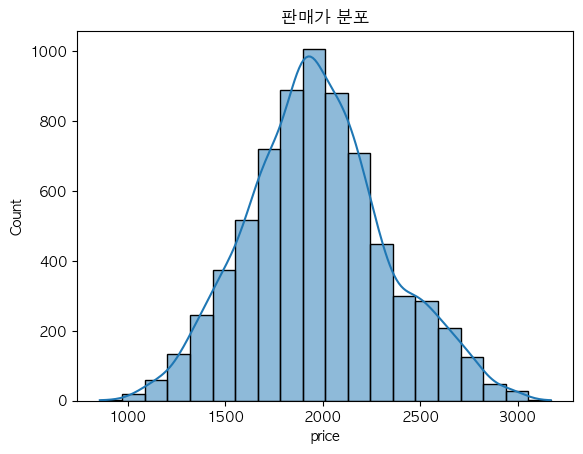

<Figure size 600x400 with 0 Axes>

In [15]:
# 여기에 코드를 작성하세요.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='price',data=df,bins=20,kde=True)
plt.title('판매가 분포')
plt.figure(figsize=(6,4))

### 문제 7. 박스플롯 해석
다음 코드로 `price`의 boxplot을 시각화한 후, **보기 중 틀린 문장**을 골라 `답안07`에 저장하세요.


**보기:**
1. 박스의 아래쪽은 Q1, 위쪽은 Q3를 나타낸다.  
2. 중앙값은 박스 안의 선으로 표현된다.  
3. 박스를 벗어난 점들은 이상치이다.  
4. 이상치는 평균보다 큰 값들이다.


<Axes: ylabel='price'>

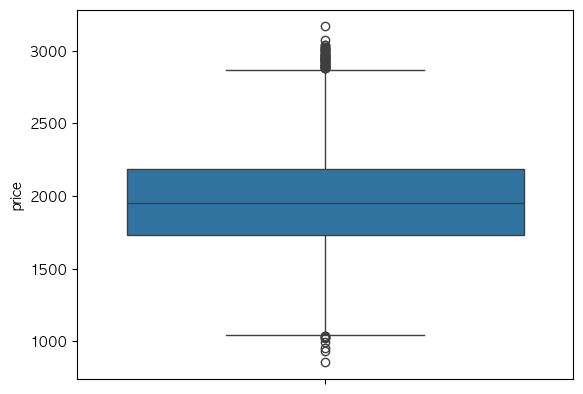

In [18]:
# 여기에 코드를 작성하세요.
sns.boxplot(data=df,y='price')

### 문제 8. 다변수 시각화
다음 조건에 따라 수치형 변수들 간의 상관관계를 시각화하고, **보기 중 틀린 해석을 선택하여 `답안08`에 저장하세요.**

- 차트의 figsize는 가로x세로 9로 적용
- 상관계수는 `df.corr()`를 활용해 계산
- 시각화는 `seaborn.heatmap()` 사용
- 색상은 연속적 컬러맵(cmap="coolwarm") 적용
- 상단에 상관계수 수치 함께 출력 (annot=True)
- 제목은 '수치형 변수 간 상관관계'로 지정

**보기:**
1. `repair_cost`와 `price`는 음의 상관관계를 가진다.  
2. `year`와 `mileage`는 서로 강한 음의 상관관계를 가진다.  
3. `option_count`와 `price`는 약한 양의 상관관계를 가진다.  
4. `prev_owners`와 `price`는 매우 강한 양의 상관관계를 가진다.

In [19]:
#이 코드를 먼저 실행 후 차트를 그리시오.
heat_cols = ['car_id', 'year', 'mileage', 'accident_yn', 'prev_owners', 'price','engine_size', 'option_count', 'repair_cost']

Text(0.5, 1.0, '수치형 변수 간 상관관계')

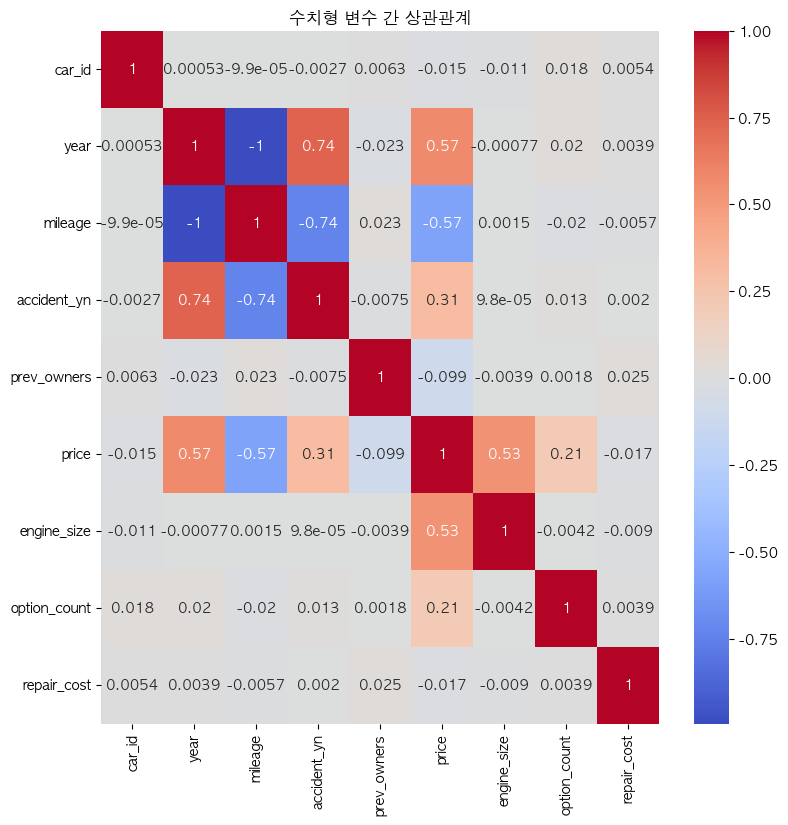

In [26]:
# 여기에 코드를 작성하세요.
plt.figure(figsize=(9,9))
sns.heatmap(df[heat_cols].corr(),annot=True,cmap='coolwarm')
plt.title('수치형 변수 간 상관관계')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        7000 non-null   int64  
 1   year          7000 non-null   int64  
 2   mileage       7000 non-null   int64  
 3   fuel_type     7000 non-null   object 
 4   brand         7000 non-null   object 
 5   engine_size   6772 non-null   float64
 6   transmission  7000 non-null   object 
 7   accident_yn   7000 non-null   int64  
 8   option_count  6812 non-null   float64
 9   prev_owners   7000 non-null   int64  
 10  repair_cost   5955 non-null   float64
 11  price         7000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 656.4+ KB
